# Laboratorio 01: Regresión Lineal

Objetivo:

1.   Introducción a tensores.
2.   Implementar el algoritmo de regresión lineal utilizando Python.
3.   Implementar el algoritmo de regresión lineal utilizando las librerías Torch.
4. Implementar el algoritmo de regresión lineal utilizando Torch.

## 1. Introducción a tensores

Un tensor PyTorch es básicamente lo mismo que una matriz numpy: no sabe nada sobre aprendizaje profundo o gráficos computacionales o gradientes, y es solo una matriz genérica n-dimensional que se utilizará para el cálculo numérico arbitrario.

![picture](https://empresas.blogthinkbig.com/wp-content/uploads/2020/04/tensor1.png?resize=640%2C423)

### 1.1 Crear un tensor

### 1.2 Estructura de un tensor

El método *size()* permite ver el tamaño de un tensor, su rango y las dimensiones.

### 1.3 Acceso a un tensor

Los elementos de un tensor pueden ser accesados de la misma manera que en **numpy** (librerías de matrices de Python).

### 1.4 Uso de tensores con CUDA (GPU)

Pytorch permite trabajar con CUDA para realizar operaciones matemáticas en GPU (Si se cuenta con una).

### 1.5 CPU vs GPU

## 2. Regresión lineal (I):

Se realiza el cálculo de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

## 3. Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

## 4. Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [ ]:
import torch
import torch.nn as nn # Modelos
import numpy as np # Librerías para las matrices
import matplotlib.pyplot as plt # Librerías para graficar

def gradient_descent(X, y, iter=10):
  n_sample, n_features = X.shape

  # 1.1 Definir la hipotesis 
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size)

  # 1.2 Funcion de perdida y configurar los parametros de optimizacion
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3 Ciclo entrenamiento
  num_epoch = iter
  for epoch in range(num_epoch):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualizo el modelo
    loss.backward() # Calcular los gradientes
    optimizer.step() 

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}: loss = {loss.item():.8f}')

  return model

def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable independiente')
  plt.ylabel('Y - Variable dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

epoch 0: loss = 6246.27392578


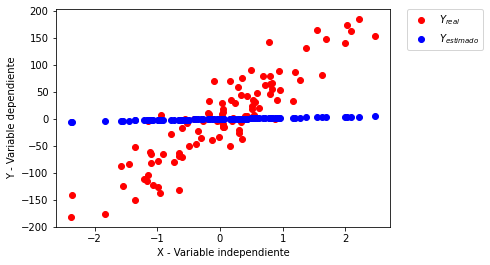

In [ ]:
from sklearn import datasets

# 0) Crear datos sintéticos para regresión
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

#plt.plot(X_numpy, y_numpy, 'ro')

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

# 1) Entrenar el modelo
model = gradient_descent(X, y, iter=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0: loss = 6269.07080078
epoch 2: loss = 5892.07861328
epoch 4: loss = 5542.94335938


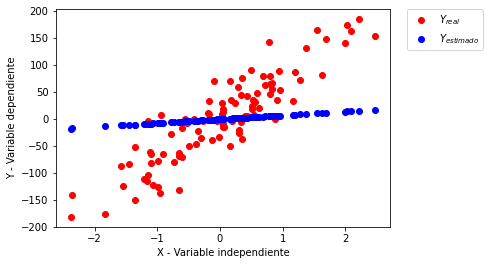

In [ ]:
# 1) Entrenar el modelo
model = gradient_descent(X, y, iter=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0: loss = 6258.58789062
epoch 2: loss = 5882.57763672
epoch 4: loss = 5534.33935547
epoch 6: loss = 5211.81787109
epoch 8: loss = 4913.11083984
epoch 10: loss = 4636.45751953
epoch 12: loss = 4380.22705078
epoch 14: loss = 4142.91162109
epoch 16: loss = 3923.11132812
epoch 18: loss = 3719.53125000


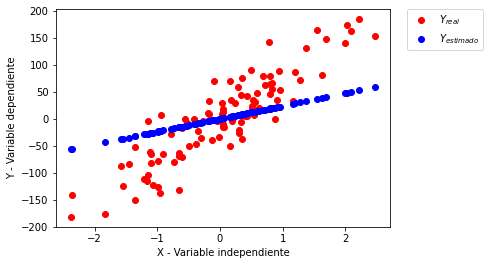

In [ ]:
# 1) Entrenar el modelo
model = gradient_descent(X, y, iter=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

In [ ]:
# 1) Entrenar el modelo
model = gradient_descent(X, y, iter=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)